In [2]:
import pandas as pd
import numpy as np

In [63]:
vehicles = pd.read_csv('vehicles.csv')
print(vehicles.head())

   barrels08  barrelsA08  charge120  charge240  city08  city08U  cityA08  \
0  14.167143         0.0        0.0        0.0      19      0.0        0   
1  27.046364         0.0        0.0        0.0       9      0.0        0   
2  11.018889         0.0        0.0        0.0      23      0.0        0   
3  27.046364         0.0        0.0        0.0      10      0.0        0   
4  15.658421         0.0        0.0        0.0      17      0.0        0   

   cityA08U  cityCD  cityE  ...  mfrCode  c240Dscr  charge240b  c240bDscr  \
0       0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   
1       0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   
2       0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   
3       0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   
4       0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   

                      createdOn                    modifiedOn  startStop  \
0  T

C:\Users\EM2025008339\AppData\Local\Temp\ipykernel_4576\1224705607.py:1: DtypeWarning: Columns (72,74,75,77) have mixed types. Specify dtype option on import or set low_memory=False.
  vehicles = pd.read_csv('vehicles.csv')


In [5]:
print(vehicles.head())

nombres_columnas = vehicles.columns.tolist()
print("Nombres de las columnas:", nombres_columnas)

   barrels08  barrelsA08  charge120  charge240  city08  city08U  cityA08  \
0  14.167143         0.0        0.0        0.0      19      0.0        0   
1  27.046364         0.0        0.0        0.0       9      0.0        0   
2  11.018889         0.0        0.0        0.0      23      0.0        0   
3  27.046364         0.0        0.0        0.0      10      0.0        0   
4  15.658421         0.0        0.0        0.0      17      0.0        0   

   cityA08U  cityCD  cityE  ...  mfrCode  c240Dscr  charge240b  c240bDscr  \
0       0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   
1       0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   
2       0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   
3       0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   
4       0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   

                      createdOn                    modifiedOn  startStop  \
0  T

# Ejercicios con Series

## Obtener Series con el consumo para ciudad y por autopista (US mpg)

In [6]:
Consumo_ciudad= sum(vehicles['city08']) / len(vehicles)
print("Consumo en ciudad:", Consumo_ciudad)

Consumo_autopista= sum(vehicles['highway08']) / len(vehicles)
print("Consumo en autopista:", Consumo_autopista)

Consumo en ciudad: 19.469220853320937
Consumo en autopista: 25.44967350647704


In [9]:
Consumo_medio_en_ciudad = vehicles ['city08'].mean()
Consumo_medio_en_autopista = vehicles ['highway08'].mean()

print("Consumo medio en ciudad (método mean):", Consumo_medio_en_ciudad)
print("Consumo medio en autopista (método mean):", Consumo_medio_en_autopista)

Consumo medio en ciudad (método mean): 19.469220853320937
Consumo medio en autopista (método mean): 25.44967350647704


## Obtener el consumo medio (US mpg)

In [7]:
Consumo_medio= (Consumo_ciudad + Consumo_autopista) / 2
print("Consumo medio:", Consumo_medio)

Consumo medio: 22.459447179898987


## Calcula el consumo medio de todos los vehículos. Calcula también el mayor consumo

--- Consumo Medio y Mayor Consumo ---
Consumo Combinado Promedio de Todos los Vehículos (MPG): 21.65

Vehículo(s) con el Mayor Consumo (Menor MPG) Destacado:
       make    model  year  comb08 fuelType
Lamborghini Countach  1986       7  Premium
Lamborghini Countach  1987       7  Premium
Lamborghini Countach  1988       7  Premium
Lamborghini Countach  1989       7  Premium
Lamborghini Countach  1990       7  Premium

--- Datos del Gráfico (Consumo Medio Agregado) ---
                 label    comb08
   GMC Sierra 1500 4WD 14.489933
  Ford F150 Pickup 4WD 14.796209
  Ford F150 Pickup 2WD 15.659389
   GMC Sierra 1500 2WD 15.879195
      Chevrolet Camaro 19.222727
          Ford Mustang 19.767442
Ford Ranger Pickup 2WD 20.455621
          Honda Accord 24.644578
      Volkswagen Jetta 27.400990
           Honda Civic 29.164474


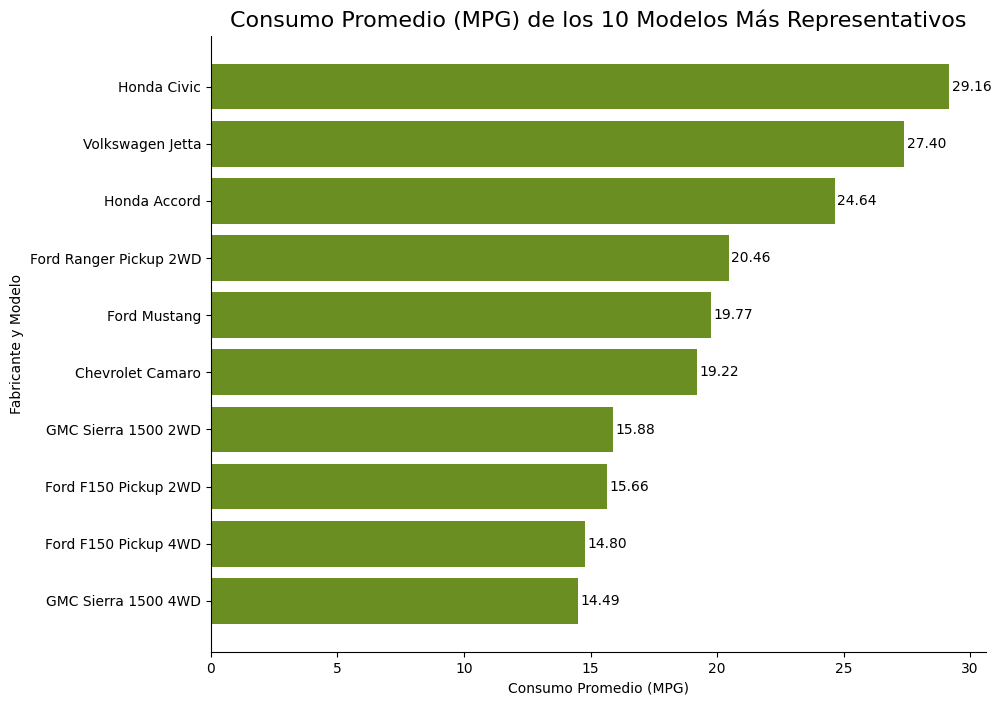

In [26]:
import pandas as pd

# --- 1. Calcular el Consumo Medio de Todos los Vehículos ---
consumo_combinado_promedio = vehicles['comb08'].mean()

# --- 2. Encontrar el Mayor Consumo (Menor MPG) ---
min_mpg = vehicles['comb08'].min()
vehiculos_alto_consumo = vehicles[vehicles['comb08'] == min_mpg]
columnas_destacadas = ['make', 'model', 'year', 'comb08', 'fuelType']
vehiculos_alto_consumo_info = vehiculos_alto_consumo[columnas_destacadas]

# Imprimir los resultados
print("--- Consumo Medio y Mayor Consumo ---")
print(f"Consumo Combinado Promedio de Todos los Vehículos (MPG): {consumo_combinado_promedio:.2f}")

print("\nVehículo(s) con el Mayor Consumo (Menor MPG) Destacado:")
# LÍNEA CORREGIDA: Usamos .to_string() en lugar de .to_markdown()
print(vehiculos_alto_consumo_info.to_string(index=False))


import pandas as pd
import matplotlib.pyplot as plt

# --- PASO 1: Identificar los 10 modelos más representativos por frecuencia ---
# 1. Agrupar por make y model y contar
model_counts = vehicles.groupby(['make', 'model']).size().sort_values(ascending=False)
# 2. Tomar los 10 principales
top_10_models_index = model_counts.head(10).index

# --- PASO 2: Calcular el Consumo Medio (comb08) por modelo ---
# 1. Agrupar la data original por make y model y calcular el promedio de comb08
avg_consumption = vehicles.groupby(['make', 'model'])['comb08'].mean().reset_index()

# 2. Filtrar esta data agregada para incluir solo los Top 10 identificados
filtered_index = avg_consumption.set_index(['make', 'model']).index
top_10_avg = avg_consumption[filtered_index.isin(top_10_models_index)].copy()

# 3. Crear una etiqueta combinada para el gráfico (Make + Model)
top_10_avg['label'] = top_10_avg['make'] + ' ' + top_10_avg['model']

# 4. Ordenar los resultados por consumo promedio (MPG) de forma ascendente (más eficiente arriba)
top_10_avg_sorted = top_10_avg.sort_values(by='comb08', ascending=True)


# --- PASO 3: Generar la Representación Gráfica (Barra Horizontal) ---
fig, ax = plt.subplots(figsize=(10, 8))

# Graficar los 10 modelos más representativos, ordenados por eficiencia (MPG)
bars = ax.barh(top_10_avg_sorted['label'], top_10_avg_sorted['comb08'], color='olivedrab')

# Añadir el valor de MPG en las barras para mayor claridad
for bar in bars:
    ax.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2,
            f'{bar.get_width():.2f}',
            va='center')

# Configurar etiquetas y título
ax.set_title('Consumo Promedio (MPG) de los 10 Modelos Más Representativos', fontsize=16)
ax.set_xlabel('Consumo Promedio (MPG)')
ax.set_ylabel('Fabricante y Modelo')

# Eliminar el marco superior y derecho para un diseño más limpio
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Guardar la figura
plt.savefig("top_10_modelos_consumo_medio.png", bbox_inches='tight')

print("\n--- Datos del Gráfico (Consumo Medio Agregado) ---")
print(top_10_avg_sorted[['label', 'comb08']].to_string(index=False))

## Ordena por la columna de consumo en orden ascendente

In [20]:
vehicles.sort_values(by='comb08', ascending=True)

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
21057,42.501429,0.0,0.0,0.0,6,0.0000,0,0.0,0.0,0.0000,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
43338,42.501429,0.0,0.0,0.0,6,0.0000,0,0.0,0.0,0.0000,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
7901,42.501429,0.0,0.0,0.0,6,0.0000,0,0.0,0.0,0.0000,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
42064,42.501429,0.0,0.0,0.0,6,0.0000,0,0.0,0.0,0.0000,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
34522,42.501429,0.0,0.0,0.0,6,0.0000,0,0.0,0.0,0.0000,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40254,0.057600,0.0,0.0,7.5,153,153.0000,0,0.0,0.0,21.6301,...,HYX,NaN,0.0,NaN,Wed May 17 00:00:00 EDT 2023,Wed May 17 00:00:00 EDT 2023,N,0,0,0
40623,0.057600,0.0,0.0,7.5,153,155.8242,0,0.0,0.0,21.6301,...,HYX,NaN,0.0,NaN,Mon Jul 31 00:00:00 EDT 2023,Mon Jul 31 00:00:00 EDT 2023,N,0,0,0
39906,0.057600,0.0,0.0,10.0,141,140.5125,0,0.0,0.0,23.9872,...,LMU,NaN,0.0,NaN,Mon Dec 12 00:00:00 EST 2022,Thu Oct 19 00:00:00 EDT 2023,N,0,0,0
35477,0.057600,0.0,0.0,8.5,148,148.4372,0,0.0,0.0,22.7066,...,TSL,standard charger,0.0,NaN,Tue Nov 05 00:00:00 EST 2019,Wed Feb 02 00:00:00 EST 2022,N,0,0,0


## Obtener el número de vehículos que aparece de cada fabricante (make)

make
Chevrolet                           4413
Ford                                3811
GMC                                 2777
Dodge                               2689
BMW                                 2454
                                    ... 
JBA Motorcars, Inc.                    1
General Motors                         1
Environmental Rsch and Devp Corp       1
Goldacre                               1
Isis Imports Ltd                       1
Name: count, Length: 144, dtype: int64


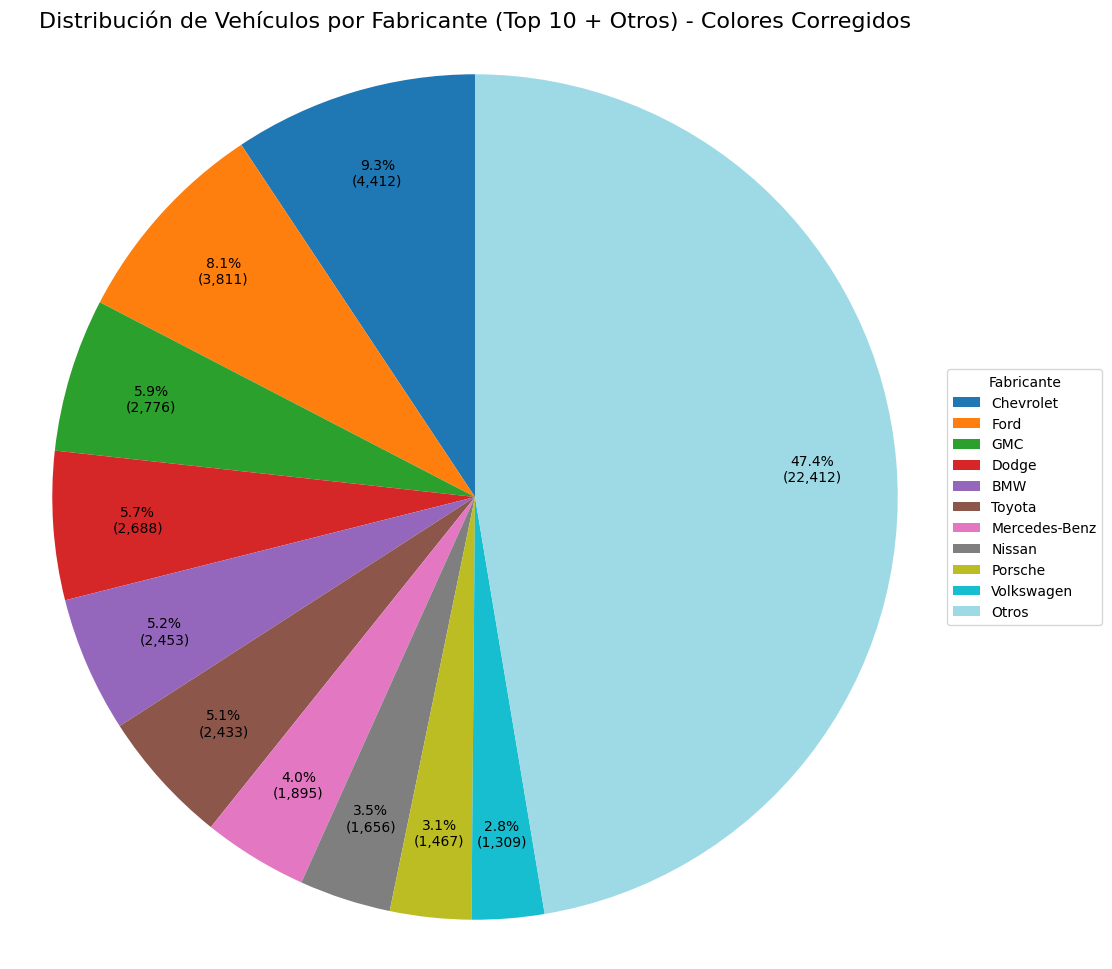

In [24]:
Num_Veh_por_fabricante = vehicles ['make'].value_counts()
print(Num_Veh_por_fabricante)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Calcular el conteo por fabricante
conteo_fabricantes = vehicles['make'].value_counts()

# 2. Definir el número de fabricantes principales a mostrar
TOP_N = 10

# 3. Preparar los datos para el gráfico de sectores: Top 10 + Otros
top_fabricantes = conteo_fabricantes.head(TOP_N)
otros = pd.Series([conteo_fabricantes.iloc[TOP_N:].sum()], index=['Otros'])
datos_para_grafico = pd.concat([top_fabricantes, otros])

# 4. Crear el gráfico de sectores (Pie Chart)
# Generamos 11 colores únicos
num_slices = len(datos_para_grafico)
colores = plt.cm.tab20(np.linspace(0, 1, num_slices))

plt.figure(figsize=(12, 12))

# Función para formatear las etiquetas con porcentaje y valor absoluto
def func(pct, allvals):
    absolute = int(pct/100.*allvals.sum())
    return f"{pct:.1f}%\n({absolute:,})"

plt.pie(
    datos_para_grafico,
    autopct=lambda pct: func(pct, datos_para_grafico),
    textprops={'color': "black"},
    startangle=90,
    pctdistance=0.8,
    colors=colores # APLICACIÓN DEL COLORMAP DISTINTO
)

# Añadir la leyenda con los nombres de los fabricantes (make)
plt.legend(datos_para_grafico.index,
           title="Fabricante",
           loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1))

plt.title(f'Distribución de Vehículos por Fabricante (Top {TOP_N} + Otros) - Colores Corregidos', fontsize=16)

plt.axis('equal')

# Guardar la figura
plt.savefig("conteo_vehiculos_fabricante_pie_colores.png", bbox_inches='tight')

C:\Users\EM2025008339\AppData\Local\Temp\ipykernel_4576\1348496879.py:10: DtypeWarning: Columns (72,74,75,77) have mixed types. Specify dtype option on import or set low_memory=False.
  vehicles = pd.read_csv("vehicles.csv") # Asume que 'vehicles.csv' está en el directorio de trabajo actual.


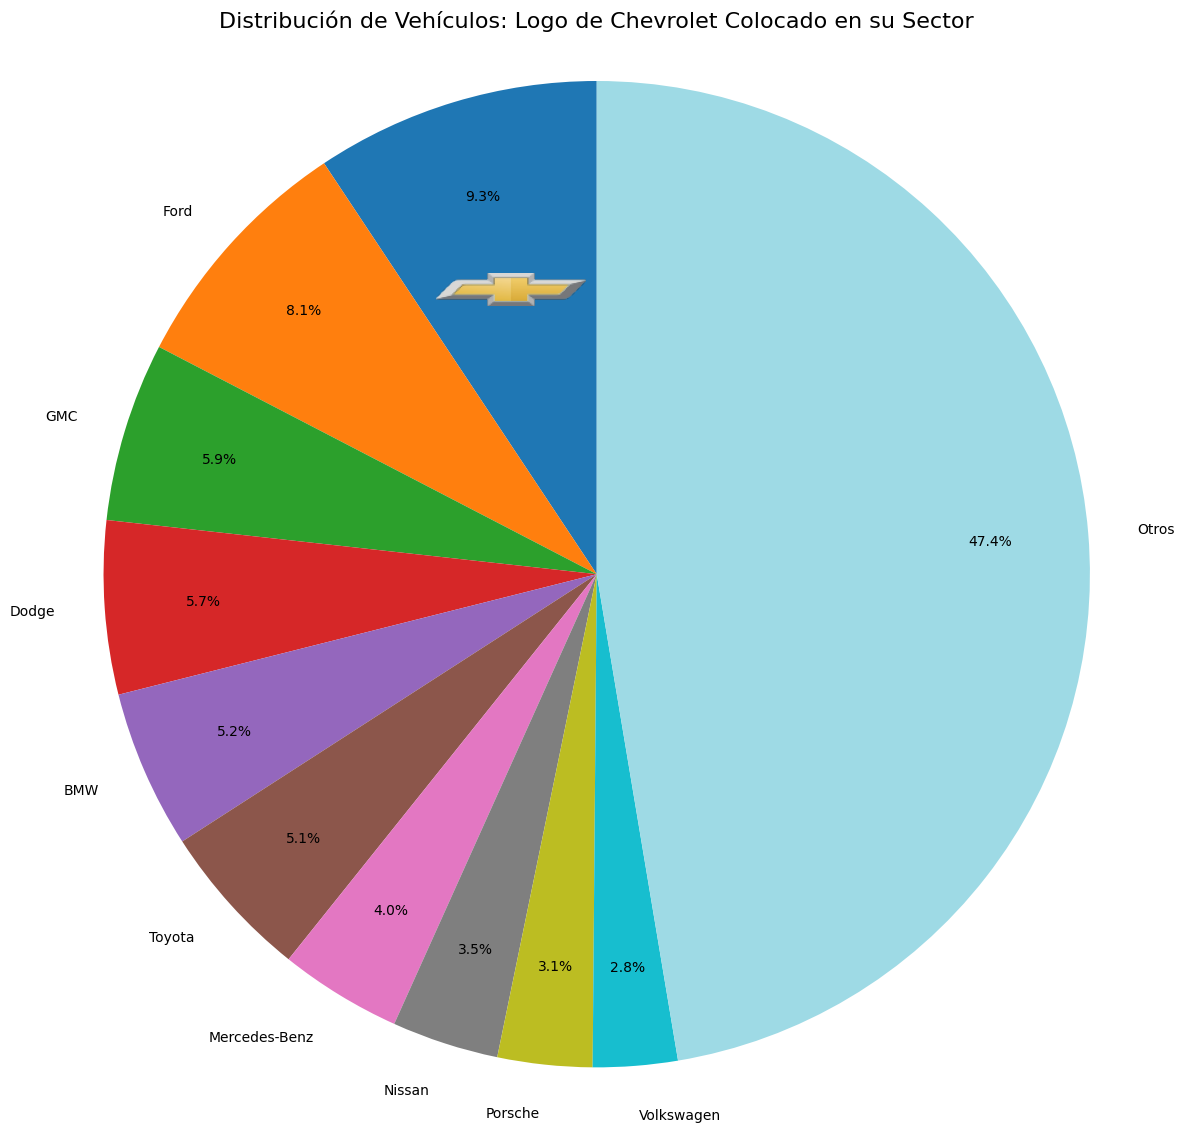

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
import numpy as np

# --- 1. CONFIGURACIÓN Y PREPARACIÓN DE DATOS ---

# Cargar el DataFrame
vehicles = pd.read_csv("vehicles.csv") # Asume que 'vehicles.csv' está en el directorio de trabajo actual.

# 1. Calcular el conteo por fabricante y definir Top 10 + Otros
conteo_fabricantes = vehicles['make'].value_counts()
TOP_N = 10
top_fabricantes = conteo_fabricantes.head(TOP_N)
otros = pd.Series([conteo_fabricantes.iloc[TOP_N:].sum()], index=['Otros'])
datos_para_grafico = pd.concat([top_fabricantes, otros])
labels = datos_para_grafico.index.tolist()
values = datos_para_grafico.values

# 2. DEFINIR RUTA Y POSICIÓN
# ¡Ruta RELATIVA! Asume que el archivo PNG está en la misma carpeta que este script.
CHEVROLET_LOGO_PATH = "chevrolet-bowtie-120.png" 
CHEVROLET_INDEX = labels.index('Chevrolet')


# --- 3. GENERACIÓN DEL GRÁFICO CON ANOTACIÓN ---

fig, ax = plt.subplots(figsize=(14, 14))

# 3.1. Dibujar el Pie Chart (sin etiquetas para la leyenda, solo en el gráfico)
wedges, texts, autotexts = ax.pie(
    values,
    labels=labels, 
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.8,
    colors=plt.cm.tab20(np.linspace(0, 1, len(labels)))
)

# 3.2. CÁLCULO DE LA POSICIÓN Y COLOCACIÓN DEL LOGO

try:
    # A) Cargar la imagen (Si el archivo no está en la carpeta, fallará aquí)
    img = mpimg.imread(CHEVROLET_LOGO_PATH)
    imagebox = OffsetImage(img, zoom=0.9) 
    imagebox.image.axes = ax

    # B) Calcular el centro (ángulo) de la cuña de Chevrolet
    wedge = wedges[CHEVROLET_INDEX]
    
    # Calcular el centro angular (theta) y radio (r) para colocar la imagen dentro del sector.
    theta = (wedge.theta1 + wedge.theta2) / 2.
    r = 0.6 # Distancia del centro del círculo (0.0 es el centro, 1.0 es el borde)
    
    # Convertir las coordenadas polares a cartesianas (X, Y)
    x = r * np.cos(np.deg2rad(theta))
    y = r * np.sin(np.deg2rad(theta))

    # C) Crear y añadir la anotación (el logo)
    ab = AnnotationBbox(
        imagebox, 
        (x, y), 
        xycoords='data',
        boxcoords="offset points",
        frameon=False,
        pad=0.0
    )
    ax.add_artist(ab)

    # 3.3. Opcional: Ocultar la etiqueta de texto en el gráfico para que solo se vea el logo
    texts[CHEVROLET_INDEX].set_visible(False)
    
except FileNotFoundError:
    print("\n--- ERROR DE ARCHIVO ---")
    print("El archivo NO se encontró. Asegúrate de que 'chevrolet-bowtie-120.png' esté en la misma carpeta que tu script.")
except Exception as e:
    print(f"\n--- ERROR DE CARGA INESPERADO ---")
    print(f"Error: {e}. Asegúrate de que el archivo sea PNG o JPG.")


# 4. CONFIGURACIÓN FINAL
ax.set_title('Distribución de Vehículos: Logo de Chevrolet Colocado en su Sector', fontsize=16)
plt.axis('equal') 
plt.savefig("pie_chart_logo_en_sector.png", bbox_inches='tight')

## Obtén el top 5 y el top10 de fabricantes

In [30]:
# 1. Calcular el conteo por fabricante
conteo_fabricantes = vehicles['make'].value_counts()

top_5_fabricantes = conteo_fabricantes.head(5)
print(top_5_fabricantes)
top_10_fabricantes = conteo_fabricantes.head(10)
print(top_10_fabricantes)



make
Chevrolet    4413
Ford         3811
GMC          2777
Dodge        2689
BMW          2454
Name: count, dtype: int64
make
Chevrolet        4413
Ford             3811
GMC              2777
Dodge            2689
BMW              2454
Toyota           2434
Mercedes-Benz    1896
Nissan           1656
Porsche          1468
Volkswagen       1310
Name: count, dtype: int64


## 
 - Si el fabricante está dentro del top5, muestra el nombre del fabricante
 - Si el fabricante está dentro del top10 (pero fuera del top5) -> 'T10'
 - Para el resto -> 'Fuera del top'


In [73]:
#Incluir en la nueva columna 'top_category' la lógica condicional solicitada
top_5_makes = conteo_fabricantes.head(5).index
top_10_makes = conteo_fabricantes.head(10).index

conditions =[ # Condición 1: Está en el Top 5
    vehicles['make'].isin(top_5_makes),
    
    # Condición 2: Está en el Top 10 (la primera condición ya excluyó al Top 5, 
    # por lo que no hay solapamiento)
    vehicles['make'].isin(top_10_makes)
]

choices = [
    # Elección 1: Mostrar el nombre del fabricante
    vehicles['make'],
    
    # Elección 2: Mostrar 'T10'
    'T10'
]

# 3. Aplicar la lógica condicional usando np.select
# El 'default' ('Fuera del top') se aplica a cualquier vehículo que no cumpla las condiciones anteriores
vehicles['top_category'] = np.select(conditions, choices, default='Fuera del top')

# 4. Mostrar el conteo de la nueva columna (para verificación)
category_counts = vehicles['top_category'].value_counts()
print(category_counts)

top_category
Fuera del top    22413
T10               8764
Chevrolet         4413
Ford              3811
GMC               2777
Dodge             2689
BMW               2454
Name: count, dtype: int64


(np.float64(-1.0999998852907071),
 np.float64(1.099998657605104),
 np.float64(-1.0999973195268027),
 np.float64(1.0999998723584192))

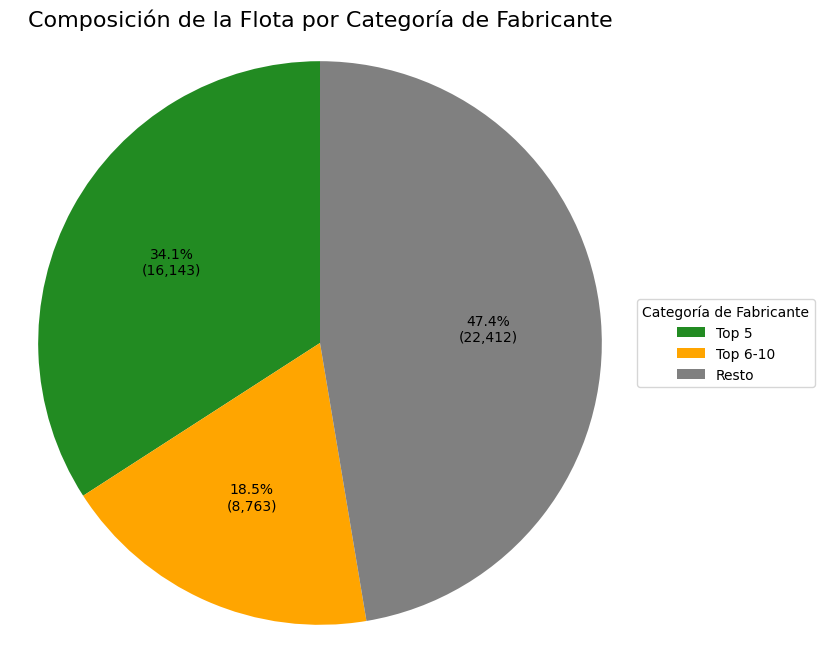

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. PREPARACIÓN DE LAS CATEGORÍAS (Lógica de np.select consolidada)
conteo_fabricantes = vehicles['make'].value_counts()
top_5_makes = conteo_fabricantes.head(5).index
top_10_makes = conteo_fabricantes.head(10).index

conditions = [
    vehicles['make'].isin(top_5_makes), # Condición 1: Top 5
    vehicles['make'].isin(top_10_makes) # Condición 2: Top 6-10 (si no es Top 5)
]

choices = [
    'Top 5',
    'Top 6-10'
]

# Crea la columna 'super_category'
vehicles['super_category'] = np.select(conditions, choices, default='Resto')

# 2. CALCULAR LA COMPOSICIÓN (Conteo y Orden)
composition_counts = vehicles['super_category'].value_counts()
order = ['Top 5', 'Top 6-10', 'Resto']
composition_counts = composition_counts.reindex(order)

# 3. GENERAR EL DIAGRAMA DE SECTORES (Pie Chart)
fig, ax = plt.subplots(figsize=(8, 8))

# Función para formatear las etiquetas con porcentaje y conteo absoluto
def func(pct, allvals):
    absolute = int(pct/100.*allvals.sum())
    return f"{pct:.1f}%\n({absolute:,})"

wedges, texts, autotexts = ax.pie(
    composition_counts.values,
    autopct=lambda pct: func(pct, composition_counts.values),
    startangle=90,
    colors=['forestgreen', 'orange', 'gray'], # Colores claros para distinción
    textprops={'color': "black"}
)

# Añadir leyenda y título
ax.legend(wedges, composition_counts.index,
           title="Categoría de Fabricante",
           loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1))

ax.set_title('Composición de la Flota por Categoría de Fabricante', fontsize=16)
plt.axis('equal')

In [77]:
# 1. Obtener el conteo del Top 5
conteo_fabricantes = vehicles['make'].value_counts()
top_5_makes = conteo_fabricantes.head(5).index
conteo_top5 = conteo_fabricantes.loc[top_5_makes]

# 2. Calcular el porcentaje de cada marca DENTRO del total Top 5
total_top5 = conteo_top5.sum()
composicion_top5_pct = (conteo_top5 / total_top5) * 100

# 3. Formatear y presentar
reporte_top5 = pd.DataFrame({
    'Marca': conteo_top5.index,
    'Conteo_Vehiculos': conteo_top5.values,
    'Porcentaje_del_Total_Top5': composicion_top5_pct.values
})

C:\Users\EM2025008339\AppData\Local\Temp\ipykernel_4576\2682468601.py:6: DtypeWarning: Columns (72,74,75,77) have mixed types. Specify dtype option on import or set low_memory=False.
  vehicles = pd.read_csv("vehicles.csv")


Gráfico de sectores de la composición interna del Top 5 generado y guardado como composicion_interna_top5.png


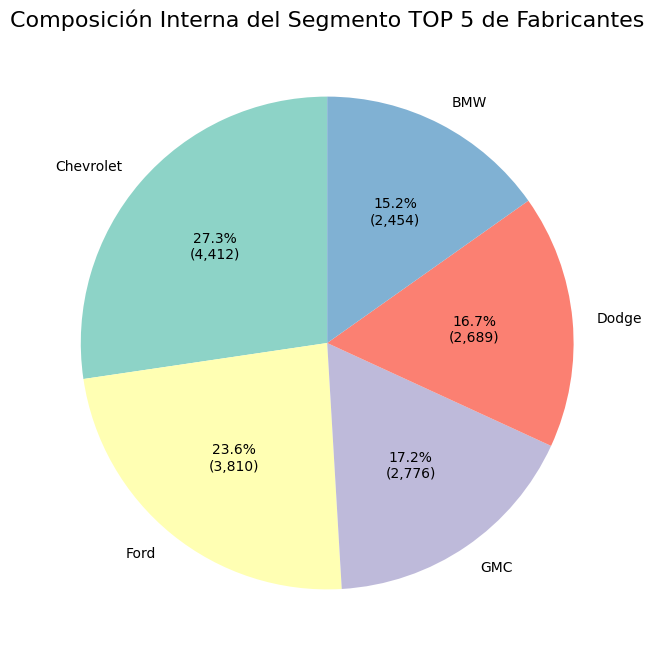

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Cargar el DataFrame
vehicles = pd.read_csv("vehicles.csv")

# 1. CALCULAR LA COMPOSICIÓN INTERNA DEL TOP 5
conteo_fabricantes = vehicles['make'].value_counts()
top_5_makes = conteo_fabricantes.head(5).index
conteo_top5 = conteo_fabricantes.loc[top_5_makes]

total_top5 = conteo_top5.sum()
composicion_top5_pct = (conteo_top5 / total_top5) * 100

# Crear el DataFrame para graficar
reporte_top5 = pd.DataFrame({
    'Marca': conteo_top5.index,
    'Conteo_Vehiculos': conteo_top5.values,
    'Porcentaje_del_Total_Top5': composicion_top5_pct.values
})

# 2. GENERAR EL DIAGRAMA DE SECTORES (Pie Chart)
fig, ax = plt.subplots(figsize=(8, 8))

# Función para formatear las etiquetas con porcentaje y conteo absoluto
def func(pct, allvals):
    absolute = int(pct/100.*allvals.sum())
    return f"{pct:.1f}%\n({absolute:,})"

wedges, texts, autotexts = ax.pie(
    reporte_top5['Conteo_Vehiculos'],
    labels=reporte_top5['Marca'],
    autopct=lambda pct: func(pct, reporte_top5['Conteo_Vehiculos'].values),
    startangle=90,
    textprops={'color': "black"},
    colors=plt.cm.Set3.colors # Usar un colormap distinto para claridad
)

# Configuración y título
ax.set_title('Composición Interna del Segmento TOP 5 de Fabricantes', fontsize=16)

# 3. Guardar la figura
plt.savefig("composicion_interna_top5.png", bbox_inches='tight')
print("Gráfico de sectores de la composición interna del Top 5 generado y guardado como composicion_interna_top5.png")

## Reemplaza 'Alfa Romeo' por 'A.L.F.A Romeo Automobili'

In [ ]:
#Mapeo de Valores
sustitucion = {'Alfa Romeo': 'A.L.F.A. Romeo Automobili'}

#Aplico cambios
vehicles['make']=vehicles['makes'].replace(sustitucion)

## Convierte a minúsculas el nombre de los fabricantes

In [33]:
vehicles ['make_minus']= vehicles ['make'].str.lower()

print(vehicles[['make', 'make_minus']].head().to_string(index=False))

      make make_minus
Alfa Romeo alfa romeo
   Ferrari    ferrari
     Dodge      dodge
     Dodge      dodge
    Subaru     subaru


## Compara el consumo de memoria de la columna 'make' como String y como Categoría

In [58]:
# 1. Calcular el uso de memoria como string (object)
memory_string = vehicles['make'].memory_usage(deep=True)

# 2. Convertir a categoría y calcular el nuevo uso de memoria
vehicles['make_category'] = vehicles['make'].astype('category')
memory_category = vehicles['make_category'].memory_usage(deep=True)

# 3. Calcular el ahorro
memory_saving = memory_string - memory_category
saving_percentage = (memory_saving / memory_string) * 100

print(f"Uso de Memoria como String (object): {memory_string:,} bytes")
print(f"Uso de Memoria como Categoría: {memory_category:,} bytes")
print(f"Ahorro de Memoria Total: {memory_saving:,} bytes")
print(f"Porcentaje de Ahorro: {saving_percentage:.2f}%")

Uso de Memoria como String (object): 2,618,840 bytes
Uso de Memoria como Categoría: 107,609 bytes
Ahorro de Memoria Total: 2,511,231 bytes
Porcentaje de Ahorro: 95.89%


# Dataframe

## Crea un nuevo dataframe con las siguientes columnas ('year', 'make', 'model', 'city08)

In [31]:
New_vehicles= vehicles[['year', 'make', 'model', 'city08']]
print(New_vehicles.head())

   year        make                model  city08
0  1985  Alfa Romeo   Spider Veloce 2000      19
1  1985     Ferrari           Testarossa       9
2  1985       Dodge              Charger      23
3  1985       Dodge  B150/B250 Wagon 2WD      10
4  1993      Subaru     Legacy AWD Turbo      17


## Crea una nueva columna para el consumo en ciudad en (L/100 km)
El factor de conversión de mpg a L/100km es: 235.215 para galones de EE. UU

In [57]:
# Definir la constante de conversión
CONVERSION_FACTOR = 235.215

# Crear la nueva columna aplicando la fórmula: L/100km = 235.215 / MPG
vehicles['city08_L_per_100km'] = CONVERSION_FACTOR / vehicles['city08']

print("Nueva columna 'city08_L_per_100km' creada exitosamente.")

print (vehicles[['city08', 'city08_L_per_100km']].head().to_string(index=False))

Nueva columna 'city08_L_per_100km' creada exitosamente.
 city08  city08_L_per_100km
     19           12.379737
      9           26.135000
     23           10.226739
     10           23.521500
     17           13.836176


# Filtra por los fabricantes 'Subaru' y 'Toyota'. Usa la función query para filtrar los vehículos cuyo consumo sea menor de 6L/100km

In [60]:
# Definir la consulta como una cadena de texto
query_string = "make in ['Subaru', 'Toyota'] and city08_L_per_100km < 6"

# Aplicar la consulta al DataFrame
filtered_vehicles = vehicles.query(query_string)

print("Vehículos filtrados exitosamente.")

print(filtered_vehicles[['make', 'model', 'year', 'city08_L_per_100km']].to_string(index=False))


Vehículos filtrados exitosamente.
  make                        model  year  city08_L_per_100km
Toyota                      RAV4 EV  2000            2.903889
Toyota                        Prius  2001            5.600357
Toyota                      RAV4 EV  2001            2.903889
Toyota                        Prius  2002            5.600357
Toyota                      RAV4 EV  2002            2.703621
Toyota                        Prius  2003            5.600357
Toyota                      RAV4 EV  2003            2.703621
Toyota                        Prius  2004            4.900313
Toyota                        Prius  2005            4.900313
Toyota                        Prius  2006            4.900313
Toyota                        Prius  2007            4.900313
Toyota                        Prius  2008            4.900313
Toyota                        Prius  2009            4.900313
Toyota                        Prius  2010            4.612059
Toyota                        Prius 

## Haz un recuento de nulos para cada columna

barrels08        0
barrelsA08       0
charge120        0
charge240        0
city08           0
                ..
phevHwy          0
phevComb         0
top_category     0
make_minus       0
make_category    0
Length: 87, dtype: int64

--- Conteo de Nulos por Columna (Tabla) ---
c240bDscr     47186
c240Dscr      47180
sCharger      46315
rangeA        45433
fuelType2     45428
evMotor       45025
guzzler       44558
atvType       42144
tCharger      37048
trans_dscr    32277
startStop     31689
mfrCode       30808
eng_dscr      17317
drive          1186
cylinders       684
displ           682
mpgData          68
trany            11


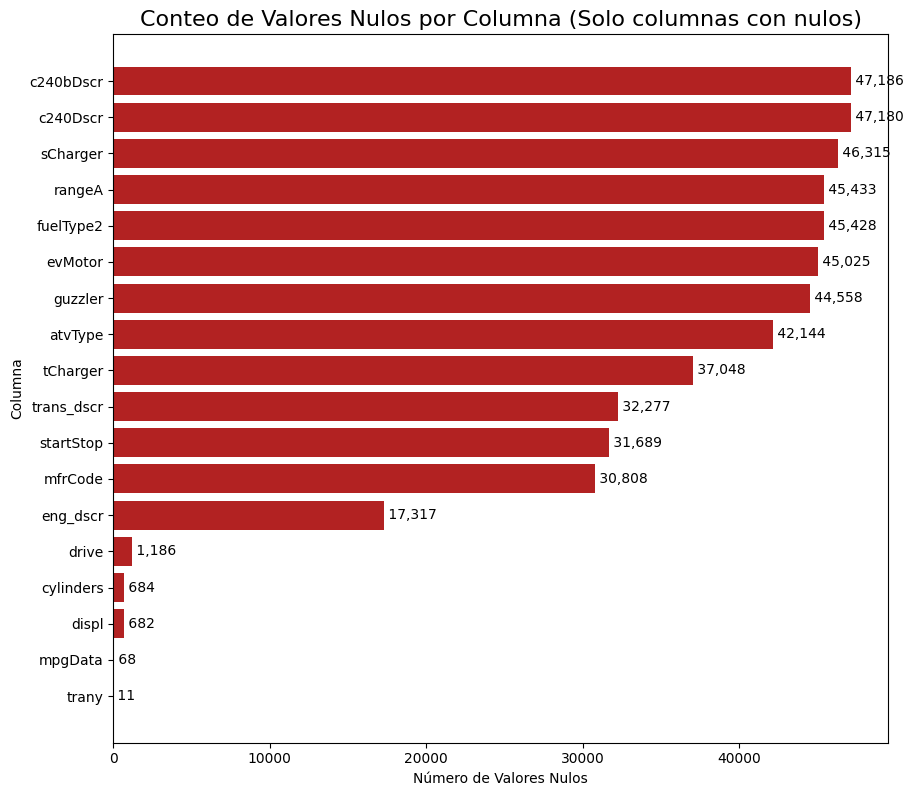

In [ ]:
#Contar nulos por columnas
nulos_por_columna = vehicles.isnull().sum()
print(nulos_por_columna)

# 1. Contar nulos por columna (código que proporcionaste)
nulos_por_columna = vehicles.isnull().sum()

# 2. Filtrar solo columnas con nulos (> 0) y ordenar de mayor a menor
nulos_a_graficar = nulos_por_columna[nulos_por_columna > 0].sort_values(ascending=False)

# Si el DataFrame filtrado no está vacío, procedemos a graficar
if not nulos_a_graficar.empty:
    # 3. Crear el gráfico de barras horizontal (se ajusta el tamaño vertical a las columnas)
    fig, ax = plt.subplots(figsize=(10, len(nulos_a_graficar) * 0.4 + 2))

    # Graficar los nulos
    ax.barh(nulos_a_graficar.index, nulos_a_graficar.values, color='firebrick')

    # Añadir el número de nulos a la derecha de cada barra
    for index, value in enumerate(nulos_a_graficar.values):
        ax.text(value, index, f' {value:,}', va='center')

    # Configurar el gráfico
    ax.set_title('Conteo de Valores Nulos por Columna (Solo columnas con nulos)', fontsize=16)
    ax.set_xlabel('Número de Valores Nulos')
    ax.set_ylabel('Columna')
    ax.invert_yaxis() # La columna con más nulos queda arriba

    # 4. Guardar la figura
    plt.savefig("conteo_nulos_por_columna.png", bbox_inches='tight')
    
    # 5. Imprimir la tabla de conteo de nulos
    print("\n--- Conteo de Nulos por Columna (Tabla) ---")
print(nulos_a_graficar.to_string())

## Obten el máximo consumo en ciudad de cada marca por año de fabricación (Usa pivot_table)


--- Tabla Pivote de Máximo Consumo en Ciudad (Últimos 10 Años) ---
make    BMW  Chevrolet  Dodge   Ford   GMC
year                                      
2016  137.0      128.0   28.0  110.0  22.0
2017  137.0      128.0   19.0  118.0  22.0
2018  129.0      128.0   19.0  118.0  28.0
2019  124.0      128.0   19.0   43.0  28.0
2020  124.0      127.0   19.0   44.0  26.0
2021  124.0      127.0   19.0  108.0  25.0
2022  109.0      131.0   19.0  110.0  25.0
2023  115.0      131.0   21.0  110.0  24.0
2024  122.0      103.0   29.0   42.0  59.0
2025   25.0       28.0    NaN    NaN   NaN


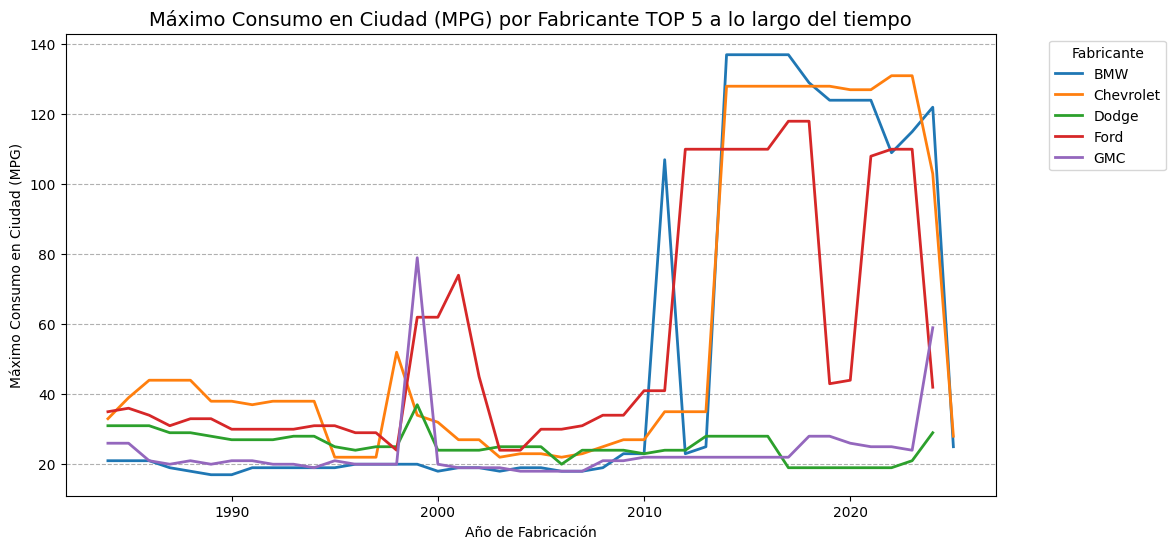

In [38]:
# 1. Identificar los Top 5 fabricantes para una visualización legible
conteo_fabricantes = vehicles['make'].value_counts()
top_5_makes = conteo_fabricantes.head(5).index.tolist()

# 2. Filtrar el DataFrame para incluir solo los Top 5
vehicles_top5 = vehicles[vehicles['make'].isin(top_5_makes)]

# 3. Crear la tabla pivote: Max. consumo en ciudad (city08) por Año y Marca
max_city_mpg_by_year = pd.pivot_table(
    vehicles_top5,
    index='year',       # Filas (Eje X: Tiempo/Longitudinal)
    columns='make',     # Columnas (Series/Líneas)
    values='city08',    # Valores a agregar
    aggfunc='max'       # Función de agregación: Máximo
)

# 4. Generar el gráfico longitudinal (Line Plot)
plt.figure(figsize=(12, 6))

# Usar el método .plot.line() directamente en la tabla pivote
max_city_mpg_by_year.plot(kind='line', ax=plt.gca(), linewidth=2)

# Configuración del gráfico
plt.title('Máximo Consumo en Ciudad (MPG) por Fabricante TOP 5 a lo largo del tiempo', fontsize=14)
plt.xlabel('Año de Fabricación')
plt.ylabel('Máximo Consumo en Ciudad (MPG)')
plt.legend(title='Fabricante', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--')

# 5. Guardar la figura
plt.savefig("maximo_consumo_ciudad_top5_longitudinal.png", bbox_inches='tight')

# 6. Mostrar la tabla pivote (los datos graficados)
print("\n--- Tabla Pivote de Máximo Consumo en Ciudad (Últimos 10 Años) ---")
print(max_city_mpg_by_year.tail(10).to_string())

## Obten el máximo consumo en ciudad de cada marca por año de fabricación (Usa groupby)

In [39]:
import pandas as pd

# 1. Identificar los Top 5 fabricantes (para replicar el conjunto de datos anterior)
conteo_fabricantes = vehicles['make'].value_counts()
top_5_makes = conteo_fabricantes.head(5).index.tolist()
vehicles_top5 = vehicles[vehicles['make'].isin(top_5_makes)]

# 2. Usar groupby para obtener el máximo consumo en ciudad por año y marca
max_city_mpg_by_year_groupby = (
    vehicles_top5.groupby(['year', 'make'])['city08'] # Agrupar por año y marca, y seleccionar 'city08'
    .max()                                          # Calcular el máximo (Max. Consumo)
    .unstack('make')                                # Desapilar para que 'make' se convierta en columnas
)

print("--- Máximo Consumo en Ciudad (MPG) por Fabricante TOP 5 (Usando GroupBy) ---")
print(max_city_mpg_by_year_groupby.tail(10).to_string())

--- Máximo Consumo en Ciudad (MPG) por Fabricante TOP 5 (Usando GroupBy) ---
make    BMW  Chevrolet  Dodge   Ford   GMC
year                                      
2016  137.0      128.0   28.0  110.0  22.0
2017  137.0      128.0   19.0  118.0  22.0
2018  129.0      128.0   19.0  118.0  28.0
2019  124.0      128.0   19.0   43.0  28.0
2020  124.0      127.0   19.0   44.0  26.0
2021  124.0      127.0   19.0  108.0  25.0
2022  109.0      131.0   19.0  110.0  25.0
2023  115.0      131.0   21.0  110.0  24.0
2024  122.0      103.0   29.0   42.0  59.0
2025   25.0       28.0    NaN    NaN   NaN


## Calcula el año promedio de fabricación para los vehículos de cada marca

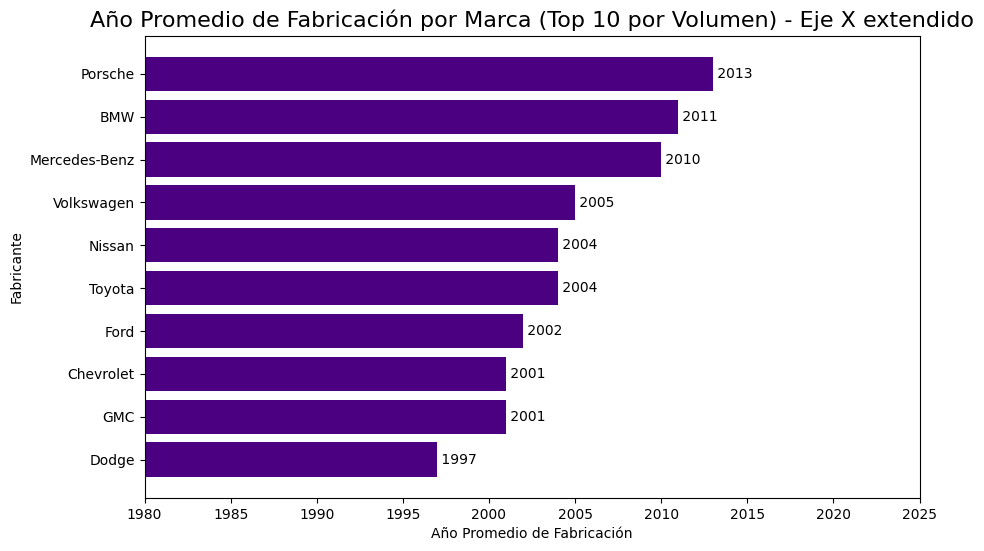

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Calcular el año promedio de fabricación y redondear
avg_year_by_make = vehicles.groupby('make')['year'].mean().sort_values(ascending=False)
conteo_fabricantes = vehicles['make'].value_counts()
top_10_makes = conteo_fabricantes.head(10).index
avg_year_top10 = avg_year_by_make[avg_year_by_make.index.isin(top_10_makes)]
avg_year_top10_rounded = avg_year_top10.round(0).astype(int)


# 2. Generar el gráfico de barras horizontal (Horizontal Bar Chart)
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar los años promedio redondeados
ax.barh(avg_year_top10_rounded.index, avg_year_top10_rounded.values, color='indigo')

# Añadir el valor del año promedio (sin decimales)
for index, value in enumerate(avg_year_top10_rounded.values):
    ax.text(value, index, f' {value}', va='center')

# Configurar el gráfico
ax.set_title('Año Promedio de Fabricación por Marca (Top 10 por Volumen) - Eje X extendido', fontsize=16)
ax.set_xlabel('Año Promedio de Fabricación')
ax.set_ylabel('Fabricante')
ax.invert_yaxis()

# --- LÍNEA CLAVE: FIJAR EL LÍMITE SUPERIOR DEL EJE X ---
ax.set_xlim(left=1980, right=2025)

# 3. Guardar la figura
plt.savefig("ano_promedio_fabricacion_top10_barras_2025.png", bbox_inches='tight')

Gráfico de eje cronológico generado y guardado como ano_promedio_fabricacion_eje_cronologico.png


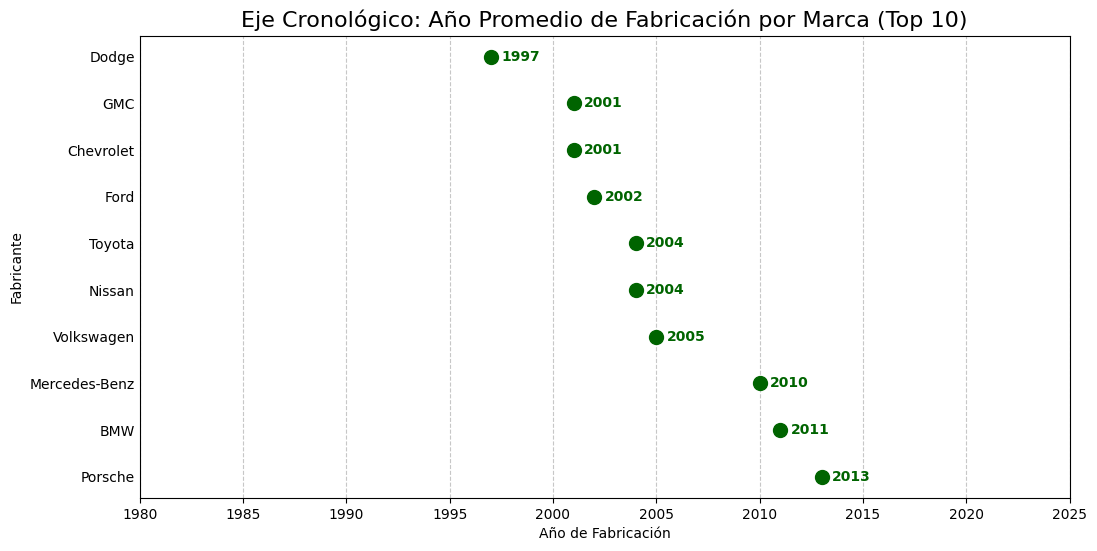

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Los datos necesarios para graficar ya están calculados:
# avg_year_top10_rounded (Serie de fabricantes y su año promedio entero)
# Conteo de fabricantes: vehicles.groupby('make')['year'].mean().sort_values(ascending=False).round(0).astype(int)
avg_year_by_make = vehicles.groupby('make')['year'].mean().sort_values(ascending=False)
conteo_fabricantes = vehicles['make'].value_counts()
top_10_makes = conteo_fabricantes.head(10).index
avg_year_top10 = avg_year_by_make[avg_year_by_make.index.isin(top_10_makes)]
avg_year_top10_rounded = avg_year_top10.round(0).astype(int)


# 2. Generar el gráfico de Dispersión (Eje Cronológico)
fig, ax = plt.subplots(figsize=(12, 6))

# Trazar los puntos en el eje cronológico (scatter plot)
# X = Año promedio, Y = Fabricante
ax.plot(
    avg_year_top10_rounded.values,  # Eje X: Años (los valores de la Serie)
    avg_year_top10_rounded.index,   # Eje Y: Fabricantes (el índice de la Serie)
    'o',                            # Usar círculos como marcadores
    color='darkgreen',
    markersize=10
)

# Añadir el año al lado de cada punto para claridad
for i, (year, make) in enumerate(zip(avg_year_top10_rounded.values, avg_year_top10_rounded.index)):
    # Usamos la posición del texto ligeramente a la derecha del punto
    ax.text(year + 0.5, i, str(year), va='center', fontsize=10, color='darkgreen', weight='bold')

# Configurar el gráfico
ax.set_title('Eje Cronológico: Año Promedio de Fabricación por Marca (Top 10)', fontsize=16)
ax.set_xlabel('Año de Fabricación')
ax.set_ylabel('Fabricante')

# Ajustar el eje X para que parezca una línea de tiempo extendida
ax.set_xlim(left=1980, right=2025)
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Ocultar las marcas del eje Y para que se vea más limpio
ax.tick_params(axis='y', length=0)

# 3. Guardar la figura
plt.savefig("ano_promedio_fabricacion_eje_cronologico.png", bbox_inches='tight')
print("Gráfico de eje cronológico generado y guardado como ano_promedio_fabricacion_eje_cronologico.png")

## Aplica la función .agg() con los argumentos ['min', 'max'] para calcular el rendimiento mínimo y máximo en ciudad para los vehículos de cada marca.

--- Rendimiento Mínimo y Máximo en Ciudad (city08) por Fabricante ---
                                    min  max
make                                        
AM General                           13   18
ASC Incorporated                     14   14
Acura                                13   38
Alfa Romeo                           11   29
American Motors Corporation          15   19
Aston Martin                          7   18
Audi                                 11  112
Aurora Cars Ltd                      12   12
Autokraft Limited                    13   15
Avanti Motor Corporation             14   15
Azure Dynamics                       62   62
BMW                                   9  137
BMW Alpina                           13   14
BYD                                  60   73
Bentley                               9   18
Bertone                              20   20
Bill Dovell Motor Car Company        17   17
Bitter Gmbh and Co. Kg               11   14
Bugatti                       

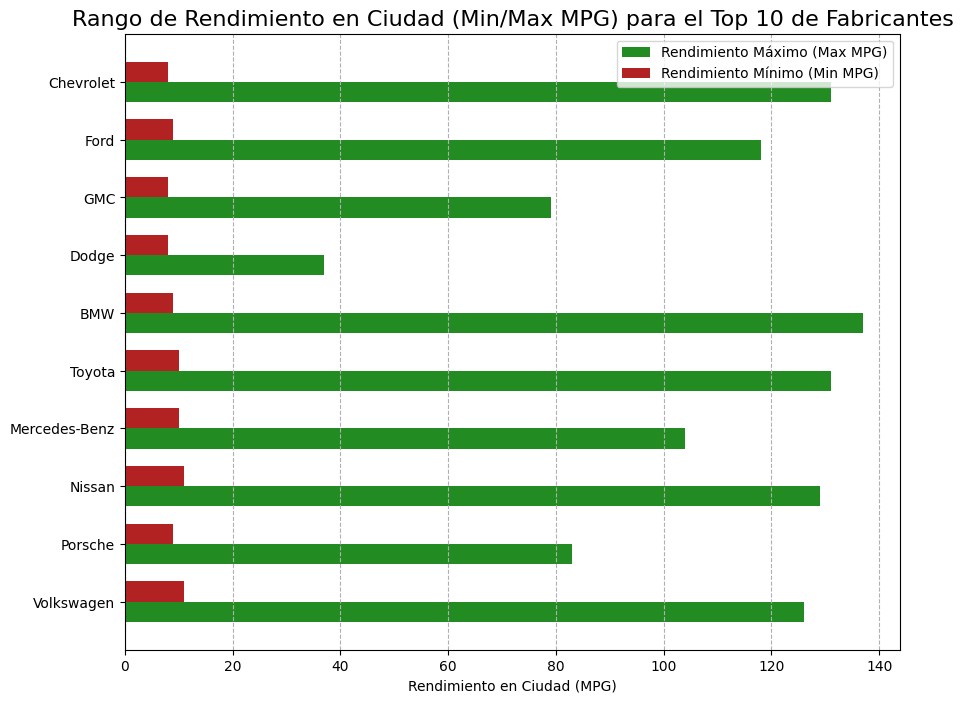

In [48]:
# Agrupar por 'make' (marca), seleccionar la columna 'city08' (consumo en ciudad)
# y aplicar las funciones de agregación 'min' y 'max'.
rendimiento_min_max_ciudad = vehicles.groupby('make')['city08'].agg(['min', 'max'])

print("--- Rendimiento Mínimo y Máximo en Ciudad (city08) por Fabricante ---")
# Se imprime la tabla completa de resultados
print(rendimiento_min_max_ciudad.to_string())

# 1. Aplicar groupby y agg para calcular el rendimiento mínimo y máximo en ciudad (city08)
rendimiento_min_max_ciudad = vehicles.groupby('make')['city08'].agg(['min', 'max'])

# 2. Identificar los Top 10 fabricantes (para filtrar el gráfico)
conteo_fabricantes = vehicles['make'].value_counts()
top_10_makes = conteo_fabricantes.head(10).index

# 3. Filtrar los resultados para incluir solo el Top 10 de fabricantes
rendimiento_top10 = rendimiento_min_max_ciudad.loc[top_10_makes]

# 4. Generar el gráfico de barras agrupadas horizontal (Comparación Min vs Max)
fig, ax = plt.subplots(figsize=(10, 8))

# Definir la posición de las barras
y_pos = range(len(rendimiento_top10.index))
bar_height = 0.35

# Trazar la barra de Rendimiento Máximo (Max) - color verde
ax.barh([p + bar_height/2 for p in y_pos], rendimiento_top10['max'], bar_height, label='Rendimiento Máximo (Max MPG)', color='forestgreen')

# Trazar la barra de Rendimiento Mínimo (Min) - color rojo
ax.barh([p - bar_height/2 for p in y_pos], rendimiento_top10['min'], bar_height, label='Rendimiento Mínimo (Min MPG)', color='firebrick')

# Configurar el gráfico
ax.set_yticks(y_pos)
ax.set_yticklabels(rendimiento_top10.index)
ax.set_xlabel('Rendimiento en Ciudad (MPG)')
ax.set_title('Rango de Rendimiento en Ciudad (Min/Max MPG) para el Top 10 de Fabricantes', fontsize=16)
ax.legend()
ax.grid(axis='x', linestyle='--')

# Invertir el eje Y para que el fabricante con más vehículos (Chevrolet) esté arriba
ax.invert_yaxis()

# 5. Guardar la figura
plt.savefig("rendimiento_min_max_ciudad_top10.png", bbox_inches='tight')

In [50]:
# --- PASO 1: Analizar la distribución de rendimiento (comb08) ---
# Se usan los terciles (0.33 y 0.66) para dividir la población en tres grupos de tamaño similar.
quartiles = vehicles['comb08'].quantile([0.33, 0.66])
q1 = quartiles.iloc[0] # Tercil inferior
q2 = quartiles.iloc[1] # Tercil superior

# Definir los límites y las etiquetas
bins = [vehicles['comb08'].min() - 1, q1, q2, vehicles['comb08'].max() + 1]
labels = ['Bajo (<{:.1f} MPG)'.format(q1),
          'Medio ({:.1f}-{:.1f} MPG)'.format(q1, q2),
          'Alto (>{:.1f} MPG)'.format(q2)]

# --- PASO 2: Crear la columna de categorías ---
vehicles['performance_category'] = pd.cut(
    vehicles['comb08'],
    bins=bins,
    labels=labels,
    include_lowest=True,
    right=True # Los intervalos son [a, b) excepto el último, que es (q2, max]
)

# --- PASO 3: Contar las categorías ---
category_counts = vehicles['performance_category'].value_counts().sort_index()

# Imprimir la tabla de resultados
print("--- Conteo de Vehículos por Categoría de Rendimiento ---")
print(category_counts.to_string())

--- Conteo de Vehículos por Categoría de Rendimiento ---
performance_category
Bajo (<18.0 MPG)         17655
Medio (18.0-22.0 MPG)    15006
Alto (>22.0 MPG)         14660


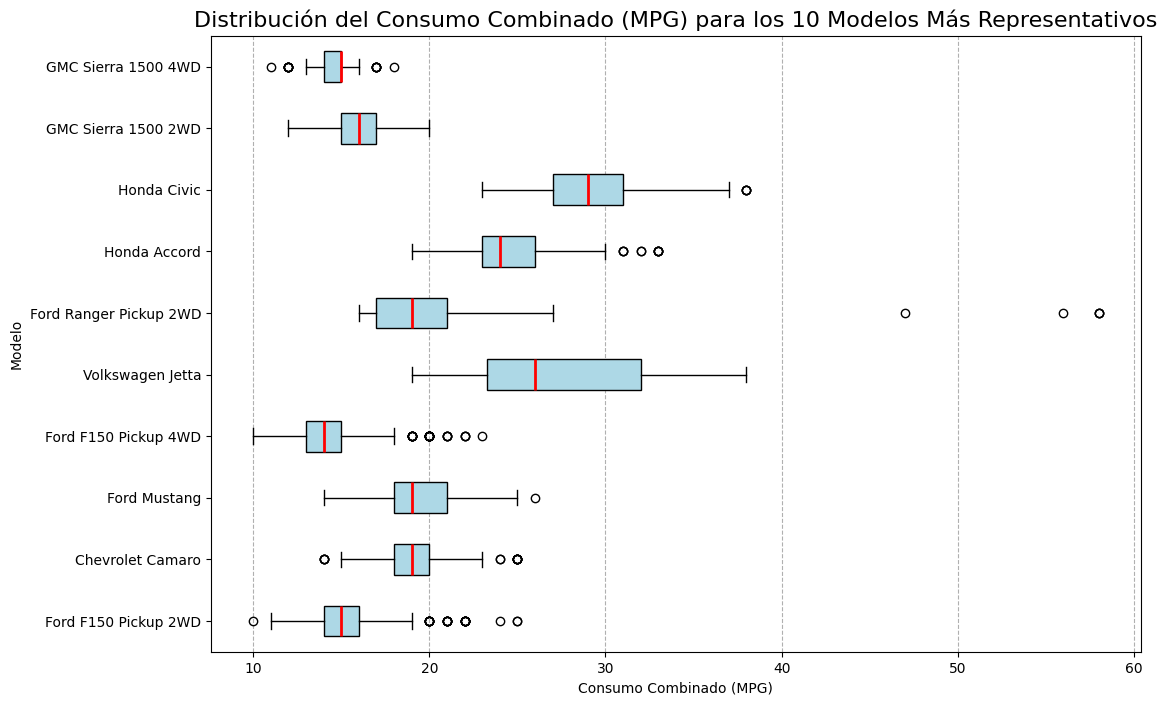

In [51]:
# 1. Identificar y filtrar los 10 modelos más representativos
model_counts = vehicles.groupby(['make', 'model']).size().sort_values(ascending=False)
top_10_models_index = model_counts.head(10).index
vehicles_filtered = vehicles[vehicles.set_index(['make', 'model']).index.isin(top_10_models_index)].copy()
vehicles_filtered['label'] = vehicles_filtered['make'] + ' ' + vehicles_filtered['model']

# 2. Preparar los datos agrupados para el Box Plot
data_to_plot = []
ordered_labels = [f'{make} {model}' for make, model in top_10_models_index]

for make_model_label in ordered_labels:
    data_to_plot.append(vehicles_filtered[vehicles_filtered['label'] == make_model_label]['comb08'].dropna())

# 3. Generar el Box Plot Horizontal
fig, ax = plt.subplots(figsize=(12, 8))

ax.boxplot(data_to_plot, vert=False, patch_artist=True,
           boxprops=dict(facecolor='lightblue', color='black'),
           medianprops=dict(color='red', linewidth=2)) # Mediana en rojo

# Configurar el gráfico
ax.set_yticklabels(ordered_labels)
ax.set_title('Distribución del Consumo Combinado (MPG) para los 10 Modelos Más Representativos', fontsize=16)
ax.set_xlabel('Consumo Combinado (MPG)')
ax.set_ylabel('Modelo')
ax.grid(axis='x', linestyle='--')

# 4. Guardar la figura
plt.savefig("box_plot_top_10_modelos.png", bbox_inches='tight')

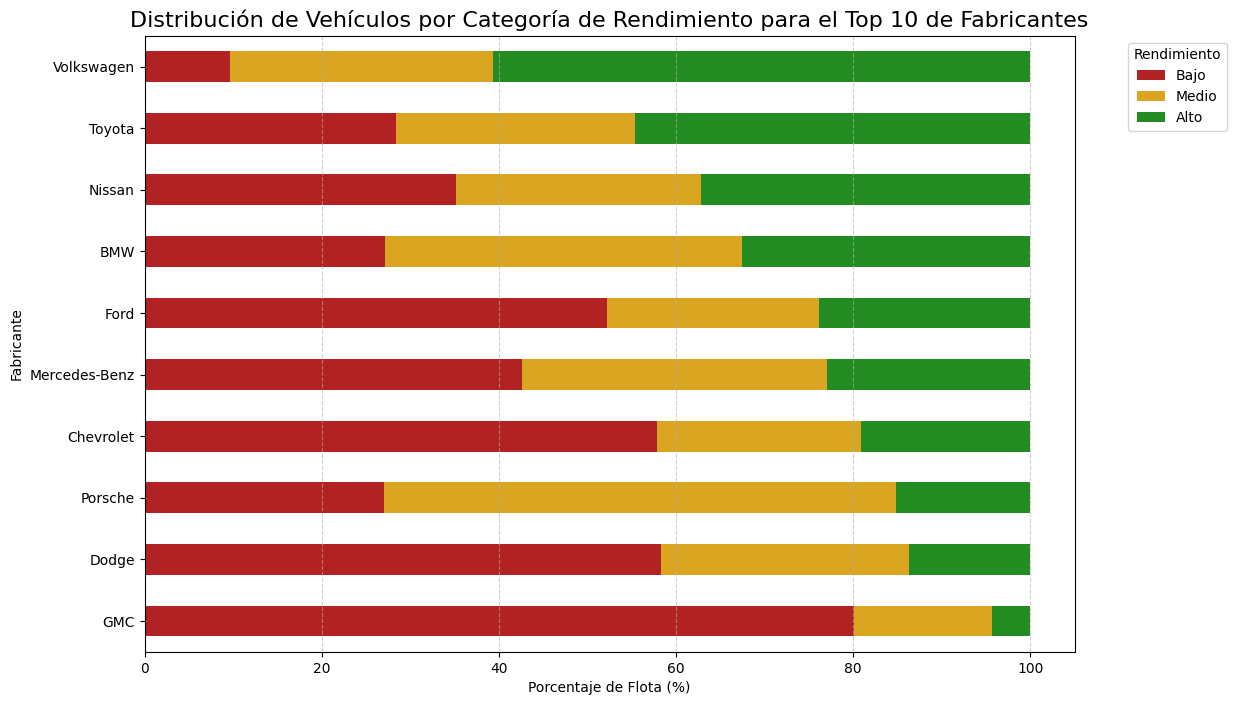

In [55]:
# --- 1. Crear la columna de categorías de rendimiento (Bajo, Medio, Alto) ---
quartiles = vehicles['comb08'].quantile([0.33, 0.66])
q1 = quartiles.iloc[0]
q2 = quartiles.iloc[1]
bins = [vehicles['comb08'].min() - 1, q1, q2, vehicles['comb08'].max() + 1]
labels = ['Bajo', 'Medio', 'Alto']

vehicles['performance_category'] = pd.cut(
    vehicles['comb08'],
    bins=bins,
    labels=labels,
    include_lowest=True,
    right=True
)

# 2. Filtrar por Top 10 Fabricantes
conteo_fabricantes = vehicles['make'].value_counts()
top_10_makes = conteo_fabricantes.head(10).index
vehicles_top10 = vehicles[vehicles['make'].isin(top_10_makes)].copy()

# 3. Crear la tabla de contingencia de porcentajes (crosstab)
# 'normalize=index' calcula el porcentaje de cada categoría dentro de cada fila (fabricante)
category_by_make = pd.crosstab(
    vehicles_top10['make'],
    vehicles_top10['performance_category'],
    normalize='index'
).mul(100).sort_values(by='Alto', ascending=True)

# 4. Generar el gráfico de barras apiladas (Stacked Bar Chart)
fig, ax = plt.subplots(figsize=(12, 8))

colors = ['firebrick', 'goldenrod', 'forestgreen']
categories = ['Bajo', 'Medio', 'Alto']

# Dibujar las barras apiladas, mostrando el porcentaje de cada categoría
category_by_make[categories].plot(kind='barh', stacked=True, color=colors, ax=ax)

# Configurar el gráfico
ax.set_title('Distribución de Vehículos por Categoría de Rendimiento para el Top 10 de Fabricantes', fontsize=16)
ax.set_xlabel('Porcentaje de Flota (%)')
ax.set_ylabel('Fabricante')
ax.legend(title='Rendimiento', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(axis='x', linestyle='--', alpha=0.6)

# 5. Guardar la figura
plt.savefig("distribucion_rendimiento_fabricantes_apilado.png", bbox_inches='tight')